In [12]:
import gym
import gym_mnist
import tensorflow as tf
import logging
from model import EnvModel
from modellearner import ModelLearner
from utils.dataset import iterbatches
import configs
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import log_loss, normalized_mutual_info_score as nmi_score
import cv2
import os
import matplotlib.pyplot as plt
import agents
import collections
from tqdm import tqdm
%matplotlib inline

logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)


logdir_base = 'data/experiments/varying_horizon/'
#logdir_dict = {'$\lambda_c=$' + suffix[8:] : os.path.join(logdir_base, suffix) for suffix in os.listdir(logdir_base)}
logdir_dict = {suffix[7:] : os.path.join(logdir_base, suffix) for suffix in os.listdir(logdir_base) if suffix[-1]!='b'}
#logdir_dict['wfeatures'] = 'data/experiments/linear_wfeat_wgb/'

num_evaluation_games = 500
actions_per_game = 5
goal_score_dict = {}
basename = 'simple_lenvarying_'

In [14]:
config = configs.load_config(list(logdir_dict.values())[0])
env = gym.make(config['env'])
tf.reset_default_graph()
ml = ModelLearner(env, config)
agent = agents.BFSAgent(envmodel=ml.envmodel, horizon=actions_per_game)

[2017-08-03 23:33:00,681] Making new env: mnist-linear-v0
Exception ignored in: <bound method MNISTEnv.__del__ of <gym_mnist.envs.mnist_env.MNISTEnv object at 0x7f2e1015eef0>>
Traceback (most recent call last):
  File "/home/yonadav/tensorflow/lib/python3.4/site-packages/gym/core.py", line 203, in __del__
    self.close()
  File "/home/yonadav/tensorflow/lib/python3.4/site-packages/gym/core.py", line 164, in close
    self.render(close=True)
  File "/home/yonadav/tensorflow/lib/python3.4/site-packages/gym/core.py", line 150, in render
    return self._render(mode=mode, close=close)
  File "/home/yonadav/Experiments/model-based/gym_mnist/gym_mnist/envs/mnist_env.py", line 91, in _render
    cv2.destroyWindow('game')
cv2.error: /io/opencv/modules/highgui/src/window.cpp:571: error: (-2) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Carbon support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in

In [16]:
for logname, logdir in logdir_dict.items():
    from utils.latest_checkpoint_unsafe import latest_checkpoint
    restore_path = latest_checkpoint(logdir)
    var_dict = {var.name[:-2]: var for var in tf.global_variables()}
    restoring_saver = tf.train.Saver(var_list=var_dict)

    with tf.Session() as sess:
        logger.info("Restoring variables from checkpoint: {}".format(restore_path))
        restoring_saver.restore(sess, restore_path)
        success_count = 0.
        for i in tqdm(range(num_evaluation_games)):
            s, gs = env.reset()
            actionq = collections.deque()
            actions, final_goal_likelihood = agent.policy(s, gs)
            actionq.extend(actions)
            done = False
            while True:
                action = actionq.popleft()
                _, rew, done, info = env.step(action)
                if done:
                    success_count += 1
                    break
                if len(actionq) == 0:
                    break
        print("{} win pct: {}".format(logname, success_count/num_evaluation_games))
        goal_score_dict[logname] = success_count/num_evaluation_games

[2017-08-03 23:33:23,762] Restoring variables from checkpoint: data/experiments/varying_horizon/linear_5step/model.ckpt-4993872


INFO:tensorflow:Restoring parameters from data/experiments/varying_horizon/linear_5step/model.ckpt-4993872


[2017-08-03 23:33:23,765] Restoring parameters from data/experiments/varying_horizon/linear_5step/model.ckpt-4993872
100%|██████████| 500/500 [06:10<00:00,  1.45it/s]


5step win pct: 0.974


[2017-08-03 23:39:36,717] Restoring variables from checkpoint: data/experiments/varying_horizon/linear_6step/model.ckpt-4993872


INFO:tensorflow:Restoring parameters from data/experiments/varying_horizon/linear_6step/model.ckpt-4993872


[2017-08-03 23:39:36,720] Restoring parameters from data/experiments/varying_horizon/linear_6step/model.ckpt-4993872
100%|██████████| 500/500 [06:08<00:00,  1.25it/s]


6step win pct: 0.946


[2017-08-03 23:45:47,196] Restoring variables from checkpoint: data/experiments/varying_horizon/linear_3step/model.ckpt-9997184


INFO:tensorflow:Restoring parameters from data/experiments/varying_horizon/linear_3step/model.ckpt-9997184


[2017-08-03 23:45:47,199] Restoring parameters from data/experiments/varying_horizon/linear_3step/model.ckpt-9997184
100%|██████████| 500/500 [06:05<00:00,  1.54it/s]


3step win pct: 0.794


[2017-08-03 23:51:54,373] Restoring variables from checkpoint: data/experiments/varying_horizon/linear_2step/model.ckpt-4995858


INFO:tensorflow:Restoring parameters from data/experiments/varying_horizon/linear_2step/model.ckpt-4995858


[2017-08-03 23:51:54,375] Restoring parameters from data/experiments/varying_horizon/linear_2step/model.ckpt-4995858
100%|██████████| 500/500 [06:08<00:00,  1.13it/s]


2step win pct: 0.508


[2017-08-03 23:58:04,531] Restoring variables from checkpoint: data/experiments/varying_horizon/linear_1step/model.ckpt-4992742


INFO:tensorflow:Restoring parameters from data/experiments/varying_horizon/linear_1step/model.ckpt-4992742


[2017-08-03 23:58:04,534] Restoring parameters from data/experiments/varying_horizon/linear_1step/model.ckpt-4992742
100%|██████████| 500/500 [06:02<00:00,  1.60it/s]


1step win pct: 0.534


[2017-08-04 00:04:09,014] Restoring variables from checkpoint: data/experiments/varying_horizon/linear_4step/model.ckpt-4993872


INFO:tensorflow:Restoring parameters from data/experiments/varying_horizon/linear_4step/model.ckpt-4993872


[2017-08-04 00:04:09,015] Restoring parameters from data/experiments/varying_horizon/linear_4step/model.ckpt-4993872
100%|██████████| 500/500 [06:03<00:00,  1.40it/s]

4step win pct: 0.866


In [17]:
linear_goal_score_dict = goal_score_dict

In [21]:
linear_goal_score_dict
complex_goal_score_dict

{'1step': 0.432,
 '2step': 0.688,
 '3step': 0.912,
 '4step': 0.978,
 '5step': 0.984,
 '6step': 0.986,
 '7step': 0.986,
 '8step': 0.982}

In [29]:
linear_goal_list = [linear_goal_score_dict[k] for k in sorted(linear_goal_score_dict.keys())]
complex_goal_list = [complex_goal_score_dict[k] for k in sorted(complex_goal_score_dict.keys())]

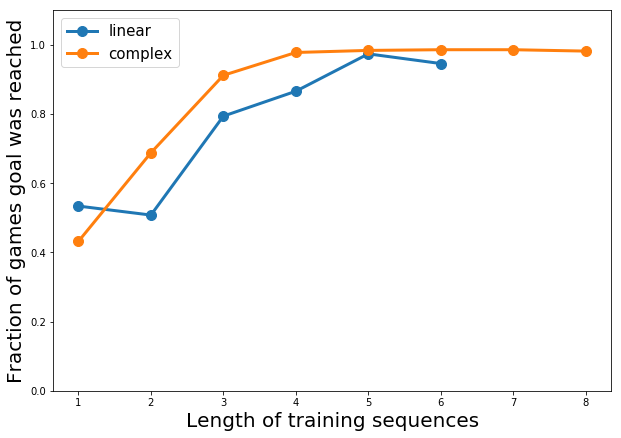

In [33]:
plt.figure(figsize=(10,7))
plt.plot(np.arange(1, len(linear_goal_list) + 1), linear_goal_list, label='linear', linewidth=3, linestyle='-', marker='o', markersize=10)
plt.plot(np.arange(1, len(complex_goal_list) + 1), complex_goal_list, label='complex', linewidth=3, linestyle='-', marker='o', markersize=10)
plt.legend(fontsize=15)
    # NOTES TO ADD: THIS IS WITH PREDICTION ALWAYS STARTING AT 5, AND REFLECTS THE FACT THAT AS X DECREASES, ACCURACY DROPS
    # BUT CHART WITHOUT ALWAYS STARTING AT 5 SHOWS OPPOSITE! BECAUSE IT'S DOING WELL CLOSE TO EDGES
plt.xlabel("Length of training sequences", size=20)
plt.gca().set_ylim(0, 1.1)
plt.ylabel("Fraction of games goal was reached", size=20)
plt.savefig(os.path.join("figures",'planning.svg'))
plt.savefig(os.path.join("figures",'planning.png'))

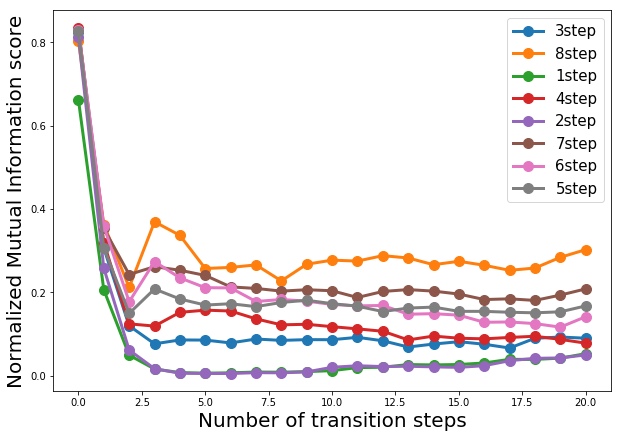

In [19]:
plt.figure(figsize=(10,7))
pairs = ((n, g) for n, g in clustering_score_dict.items() if n[-5:] != 'wfeatures')
for name, vscore in pairs:
    plt.plot(np.arange(max_val_steps + 1), vscore, label=name, linewidth=3, linestyle='-', marker='o', markersize=10)
    plt.legend(fontsize=15)
    # NOTES TO ADD: THIS IS WITH PREDICTION ALWAYS STARTING AT 5, AND REFLECTS THE FACT THAT AS X DECREASES, ACCURACY DROPS
    # BUT CHART WITHOUT ALWAYS STARTING AT 5 SHOWS OPPOSITE! BECAUSE IT'S DOING WELL CLOSE TO EDGES
    plt.xlabel("Number of transition steps", size=20)
    plt.ylabel("Normalized Mutual Information score", size=20)
plt.savefig(os.path.join("figures",basename + 'smi.svg'))
plt.savefig(os.path.join("figures",basename + 'smi.png'))

In [71]:
[n for n in clustering_score_dict.keys()]

['5step',
 '3step_nogb',
 '4step',
 '4step_nogb',
 'wfeatures',
 '2step',
 '1step',
 '6step',
 '2step_nogb',
 '6step_nogb',
 '3step',
 '5step_nogb',
 '1step_nogb']

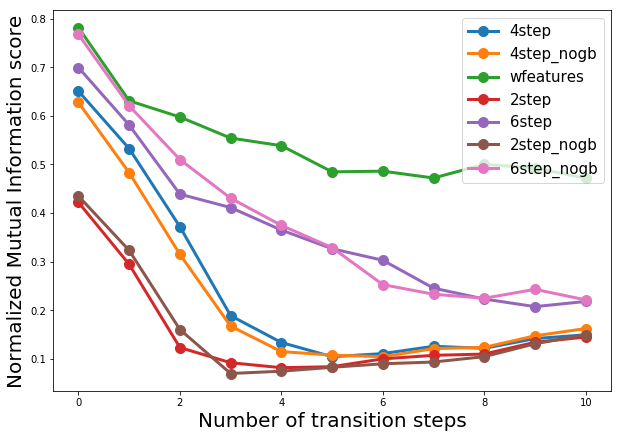

In [78]:
plt.figure(figsize=(10,7))
pairs = ((n, g) for n, g in clustering_score_dict.items() if n[0] not in '135')
for name, vscore in pairs:
    plt.plot(np.arange(max_val_steps + 1), vscore, label=name, linewidth=3, linestyle='-', marker='o', markersize=10)
    plt.legend(fontsize=15)
    # NOTES TO ADD: THIS IS WITH PREDICTION ALWAYS STARTING AT 5, AND REFLECTS THE FACT THAT AS X DECREASES, ACCURACY DROPS
    # BUT CHART WITHOUT ALWAYS STARTING AT 5 SHOWS OPPOSITE! BECAUSE IT'S DOING WELL CLOSE TO EDGES
    plt.xlabel("Number of transition steps", size=20)
    plt.ylabel("Normalized Mutual Information score", size=20)
plt.savefig('figures/smi_gbvarying.svg')
plt.savefig('figures/smi_gbvarying.png')